In [ ]:
#Jie Zhu - Python Version 3.7.1

# Question 1

In [25]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
import seaborn as sns

data = pd.read_table('http://people.stern.nyu.edu/vt527/perf.data',sep=',',header=None)

# Question 2

In [26]:
data.head(10)

,0,1,2,3,4,5
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3
5,2,23,3,1,20,3
6,2,9,5,2,19,3
7,2,10,3,2,27,3
8,1,22,3,1,58,3
9,2,15,3,1,20,3


In [27]:
data.shape

(151, 6)

In [28]:
data.columns = ['attr1', 'attr2', 'attr3', 'attr4', 
              'attr5', 'attr6']

In [29]:
data.describe()

,attr1,attr2,attr3,attr4,attr5,attr6
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.807947,13.642384,8.105960,1.847682,27.867550,2.019868
std,0.395225,6.825779,7.023914,0.360525,12.893758,0.820327
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.000000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


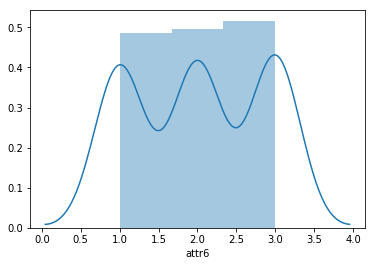

In [30]:
sns.distplot(data['attr6'])

In [31]:
data['attr6'].value_counts()

3    52
2    50
1    49
Name: attr6, dtype: int64

In [32]:
data['attr2'].value_counts()

23    17
13    14
22    12
7     11
10     8
18     8
6      8
15     8
14     8
9      8
5      6
20     5
8      5
2      4
25     4
16     4
17     4
1      4
11     3
12     2
4      2
3      2
21     2
24     1
19     1
Name: attr2, dtype: int64

In [33]:
data.loc[data.attr2 == 25,"attr2"] = np.nan

In [34]:
data.attr2.values

array([23., 15., 23.,  5.,  7., 23.,  9., 10., 22., 15., 10., 13., 18.,
        6.,  6.,  6.,  7., 22., 13.,  7., nan, nan,  2.,  1., 15.,  7.,
        8., 14., 21., 22., 11., 18., 13., 13.,  5., 16.,  4.,  5., 14.,
       23., 15., 23.,  5.,  7., 23.,  9., 10., 22., 15., 10., 13., 18.,
        6.,  6.,  6.,  7., 22., 13.,  7., nan, nan,  2.,  1., 15.,  7.,
        8., 14., 21., 22., 11., 18., 13., 13.,  5., 16.,  4.,  5., 14.,
       23., 13., 16.,  9., 13., 18., 22.,  7., 23., 23., 23., 14., 17.,
        9., 18., 17.,  1.,  1., 11., 22.,  9., 13.,  6., 23., 23.,  6.,
       22., 20., 23., 20., 23., 13., 10.,  7., 14.,  8., 12.,  8., 15.,
       23.,  2., 15., 20., 13.,  9., 10., 14., 13.,  8., 20., 22., 18.,
       20., 17., 14., 24.,  9., 12.,  9., 22.,  7., 10., 23., 17., 16.,
        3., 19., 23.,  3., 10., 18., 22.,  2.])

# Question 3

In [35]:
# Transform attr6 into binary, 1 = High, 0 = Low
data.loc[data.attr6 == 1,"attr6"] = 0
data.loc[data.attr6 == 2,"attr6"] = 0
data.loc[data.attr6 == 3,"attr6"] = 1

In [42]:
# Transform attr1 into binary, 1 = Yes, 0 = No
data.loc[data.attr1 == 2,"attr1"] = 0

# Transform attr4 into binary, 1 = Yes, 0 = No
data.loc[data.attr4 == 2,"attr4"] = 0

In [46]:
data.head(10)

,attr1,attr2,attr3,attr4,attr5,attr6
0,1,23.0,3,1,19,1
1,0,15.0,3,1,17,1
2,1,23.0,3,0,49,1
3,1,5.0,2,0,33,1
4,0,7.0,11,0,55,1
5,0,23.0,3,1,20,1
6,0,9.0,5,0,19,1
7,0,10.0,3,0,27,1
8,1,22.0,3,1,58,1
9,0,15.0,3,1,20,1


In [47]:
from sklearn.preprocessing import MinMaxScaler

#normalize data with min max scaling
scaler = MinMaxScaler(feature_range=(0, 1))

scaled = scaler.fit_transform(data)
sdata = pd.DataFrame(scaled)
sdata.columns = ['attr1', 'attr2', 'attr3', 'attr4', 
              'attr5', 'attr6']
sdata.head(10)

,attr1,attr2,attr3,attr4,attr5,attr6
0,1.0,0.956522,0.08,1.0,0.253968,1.0
1,0.0,0.608696,0.08,1.0,0.222222,1.0
2,1.0,0.956522,0.08,0.0,0.730159,1.0
3,1.0,0.173913,0.04,0.0,0.476190,1.0
4,0.0,0.260870,0.40,0.0,0.825397,1.0
5,0.0,0.956522,0.08,1.0,0.269841,1.0
6,0.0,0.347826,0.16,0.0,0.253968,1.0
7,0.0,0.391304,0.08,0.0,0.380952,1.0
8,1.0,0.913043,0.08,1.0,0.873016,1.0
9,0.0,0.608696,0.08,1.0,0.269841,1.0


# Question 4

In [53]:
sdata.shape

(151, 6)

In [54]:
sdata.dropna(axis =0, inplace=True ) 
sdata.shape

(147, 6)

In [55]:
X=sdata.iloc[:,:5]
y=sdata.iloc[:,5]

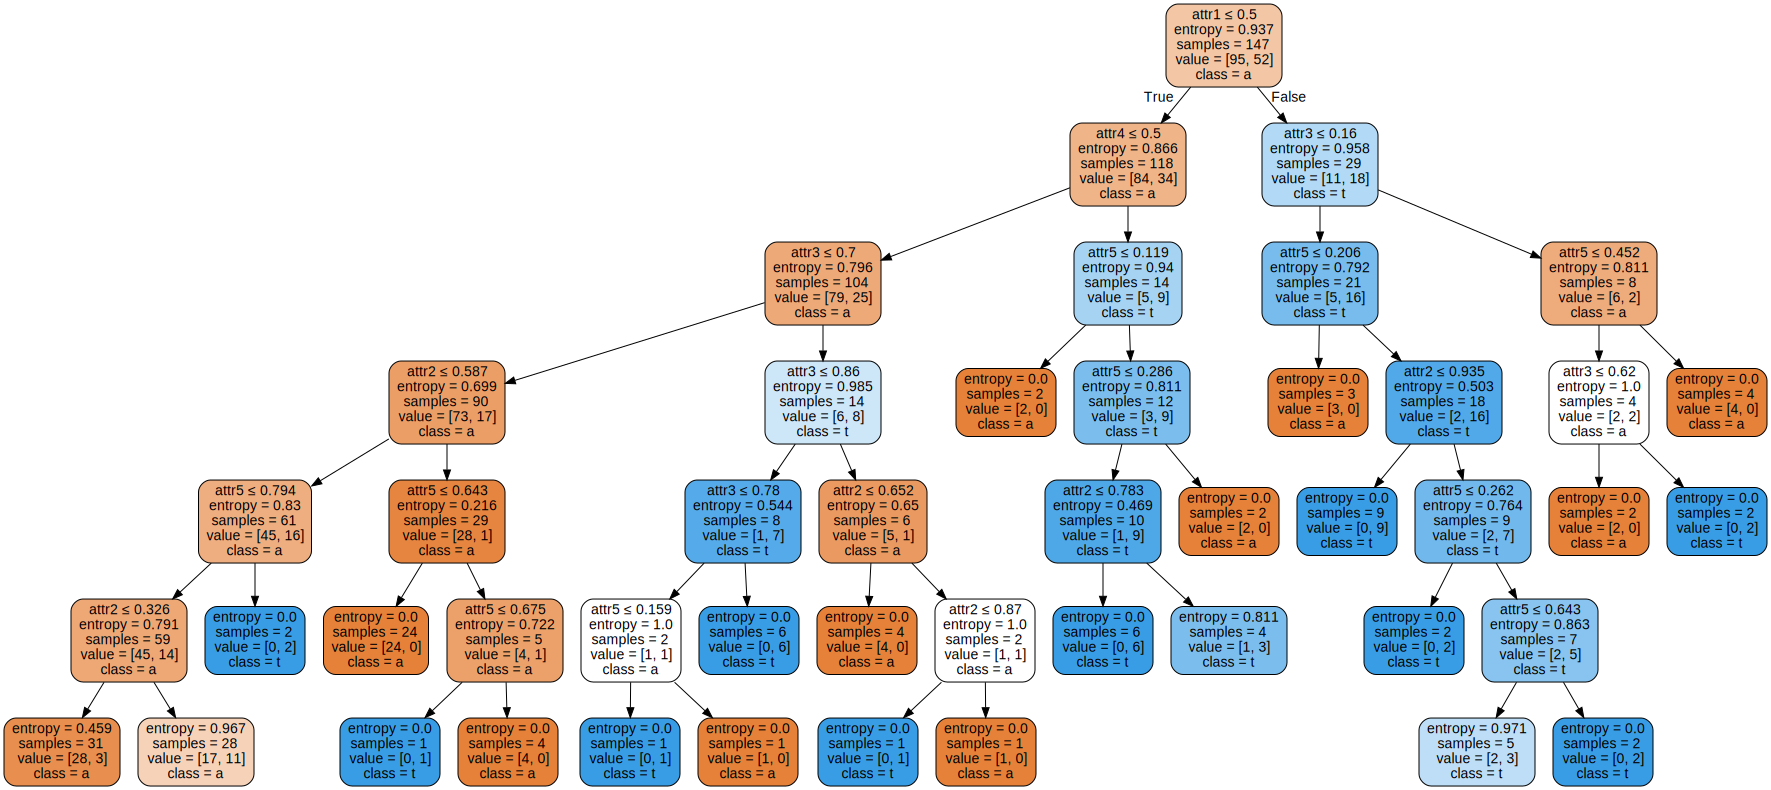

In [67]:
import graphviz
from sklearn import tree

clf1 = tree.DecisionTreeClassifier(criterion = "entropy",max_depth=6,random_state=32)
clf1 = clf1.fit(X, y)

dot_data = tree.export_graphviz(clf1, out_file=None, 
                         feature_names=sdata.columns[0:5],  
                         class_names=sdata.columns[5],  
                         filled=True, rounded=True,  
                         special_characters=True)

graph = graphviz.Source(dot_data) 
graph

In [66]:
from sklearn.model_selection import cross_val_score
np.random.seed(32)
scores = cross_val_score(clf1, X, y, cv=10, scoring = 'accuracy')
print("Cross-Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(clf1, X, y, cv=10, scoring = 'f1')
print("Cross-Validation f1: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(clf1, X, y, cv=10, scoring = 'precision')
print("Cross-Validation Precision: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(clf1, X, y, cv=10, scoring = 'recall')
print("Cross-Validation Recall: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross-Validation Accuracy: 0.75 (+/- 0.27)
Cross-Validation f1: 0.55 (+/- 0.55)
Cross-Validation Precision: 0.64 (+/- 0.67)
Cross-Validation Recall: 0.49 (+/- 0.52)


# Question 5

In [71]:
from sklearn.linear_model import LogisticRegression
np.random.seed(32)
clf2 = LogisticRegression(C = 100,penalty='l1',random_state=32)
clf2 = clf2.fit(X, y)
from sklearn.model_selection import cross_val_score
np.random.seed(32)
scores = cross_val_score(clf2, X, y, cv=10, scoring = 'accuracy')
print("Cross-Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(clf2, X, y, cv=10, scoring = 'f1')
print("Cross-Validation f1: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(clf2, X, y, cv=10, scoring = 'precision')
print("Cross-Validation Precision: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(clf2, X, y, cv=10, scoring = 'recall')
print("Cross-Validation Recall: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross-Validation Accuracy: 0.66 (+/- 0.18)
Cross-Validation f1: 0.40 (+/- 0.38)
Cross-Validation Precision: 0.53 (+/- 0.54)
Cross-Validation Recall: 0.34 (+/- 0.37)


# Question 6

In [72]:
from sklearn.neighbors import KNeighborsClassifier
clf3 = KNeighborsClassifier(n_neighbors=3)
clf3 = clf3.fit(X, y)
from sklearn.model_selection import cross_val_score
np.random.seed(32)
scores = cross_val_score(clf3, X, y, cv=10, scoring = 'accuracy')
print("Cross-Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(clf3, X, y, cv=10, scoring = 'f1')
print("Cross-Validation f1: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(clf3, X, y, cv=10, scoring = 'precision')
print("Cross-Validation Precision: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(clf3, X, y, cv=10, scoring = 'recall')
print("Cross-Validation Recall: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross-Validation Accuracy: 0.71 (+/- 0.24)
Cross-Validation f1: 0.62 (+/- 0.28)
Cross-Validation Precision: 0.60 (+/- 0.30)
Cross-Validation Recall: 0.65 (+/- 0.31)


# Question 7

10-fold cross validation:

ROC AUC: 0.69 (+/- 0.25) [Decision tree]
ROC AUC: 0.68 (+/- 0.13) [Logistic regression]
ROC AUC: 0.76 (+/- 0.14) [kNN]


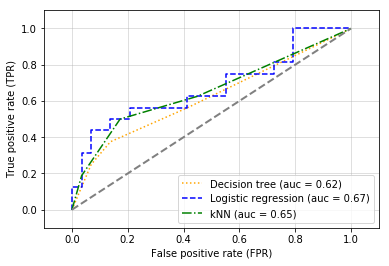

In [74]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=32, stratify=y)

clf_labels = ['Decision tree','Logistic regression', 'kNN']
all_clf = [clf1, clf2, clf3]

print('10-fold cross validation:\n')
    
for clf, label in zip([clf1, clf2, clf3], clf_labels): 
    if clf in (clf1, clf2, clf3):
        scores = cross_val_score(estimator=clf,  
                                 X=X,
                                 y=y,
                                 cv=10,
                                 scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

##################################### Visualization ######################################

colors = [ 'orange', 'blue', 'green']      
linestyles = [':', '--', '-.', '-']        
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):
    if clf in (clf1,clf2,clf3):
    # Assuming the label of the positive class is 1 and data is normalized
        y_pred = clf.fit(X_train,
                     y_train).predict_proba(X_test)[:, 1] # Make predictions based on the classifiers
        fpr, tpr, thresholds = roc_curve(y_true=y_test, # Build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)   
        # Compute Area Under the Curve (AUC) 
    plt.plot(fpr, tpr,                         # Plot ROC Curve and create label with AUC values
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')    # Where to place the legend
plt.plot([0, 1], [0, 1], # Visualize random classifier
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')


#plt.savefig('ROC_all_classifiers', dpi=300)
plt.show()

# Question 8

In [78]:
from sklearn.model_selection import GridSearchCV, KFold
inner_cv = KFold(n_splits=10, shuffle=True, random_state=32)
outer_cv = KFold(n_splits=10, shuffle=True, random_state=32)

gs_clf1 = GridSearchCV(estimator=DecisionTreeClassifier(),
                  param_grid=[{'criterion': ['gini','entropy'],
                               'max_depth':[3,4,5,6,7,8]}],
                  scoring='f1',
                  cv=inner_cv,
                  n_jobs=5)

gs_clf1 = gs_clf1.fit(X,y)  
print("Non-nested CV performance: ", gs_clf1.best_score_)
print("Optimal Parameter: ", gs_clf1.best_params_)
print("Optimal Estimator: ", gs_clf1.best_estimator_) # Estimator that was chosen by the search, i.e. estimator which gave highest score

Non-nested CV performance:  0.5676252319109462
Optimal Parameter:  {'criterion': 'gini', 'max_depth': 4}
Optimal Estimator:  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [79]:
# Question 9

In [81]:
from sklearn.model_selection import GridSearchCV, KFold
inner_cv = KFold(n_splits=10, shuffle=True, random_state=32)
outer_cv = KFold(n_splits=10, shuffle=True, random_state=32)

gs_clf2 = GridSearchCV(estimator=LogisticRegression(),
                  param_grid=[{'penalty': ['l1','l2'],
                               'C':[1,10,100]}],
                  scoring='f1',
                  cv=inner_cv,
                  n_jobs=5)

gs_clf2 = gs_clf2.fit(X,y)  
print("Non-nested CV performance: ", gs_clf2.best_score_)
print("Optimal Parameter: ", gs_clf2.best_params_)
print("Optimal Estimator: ", gs_clf2.best_estimator_) # Estimator that was chosen by the search, i.e. estimator which gave highest score

Non-nested CV performance:  0.3931148216862502
Optimal Parameter:  {'C': 10, 'penalty': 'l1'}
Optimal Estimator:  LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [ ]:
#Question 10

In [82]:
from sklearn.model_selection import GridSearchCV, KFold
inner_cv = KFold(n_splits=10, shuffle=True, random_state=32)
outer_cv = KFold(n_splits=10, shuffle=True, random_state=32)

gs_clf3 = GridSearchCV(estimator=KNeighborsClassifier(),
                  param_grid=[{'n_neighbors': [3,5,7,9,11]}],
                  scoring='f1',
                  cv=inner_cv,
                  n_jobs=5)

gs_clf3 = gs_clf3.fit(X,y)  
print("Non-nested CV performance: ", gs_clf3.best_score_)
print("Optimal Parameter: ", gs_clf3.best_params_)
print("Optimal Estimator: ", gs_clf3.best_estimator_) # Estimator that was chosen by the search, i.e. estimator which gave highest score

Non-nested CV performance:  0.5650111792968935
Optimal Parameter:  {'n_neighbors': 3}
Optimal Estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')
